In [1]:
import network as net
from mnist_loader import load_mnist_data, load_test_data, export_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold

In [2]:
def hyper_param_setting(training_data, valid_data, random_state, net_architecture, **sgd_params):
    main_param = {}
    for key, value in sgd_params.items():
        if (type(value) is list) or \
           (type(value) is tuple) or \
           (type(value) is np.ndarray):
           sgd_params.pop(key)
           main_param.update({key:value})
           print(f"Training by: {key}")
           break

    recreate_sgd_params = [{**sgd_params, key:value} for value in \
        list(main_param.values())[0]]

    results = []
    nets = []
    for params in recreate_sgd_params:
        nn = net.Network(net_architecture, random_state=random_state)
        res = nn.SGD(training_data=training_data, evaluation_data=valid_data, **params)
        results.append(res)
        nets.append(nn)

    return results, list(main_param.items())[0], nets

In [3]:
def comparing_hyper_params(hyper_param, accuracy_and_cost_results, figsize=(10, 5)):
    hp = hyper_param[0]
    values = hyper_param[1]
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    for acc, cf in accuracy_and_cost_results:
        ax1.plot(acc)
        ax2.plot(cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        ax.legend([f"{hp}={value}" for value in values])
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()

In [4]:
train, valid, test = load_mnist_data()

In [13]:
def visualisation(acc, cf, figsize=(10, 5)):
    color_cf = None
    if type(acc[0]) != list:
        acc = [acc]
        cf = [cf]
        color_cf = "orange" 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    epochs = len(acc[0])
    for acc_i, cf_i in zip(acc, cf):
        ax1.plot(range(1, epochs+1), np.array(acc_i)*100)
        ax2.plot(range(1, epochs+1), cf_i, color=color_cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()

In [14]:
EPOCHS = 30
RS = None

start = time.time()
netw = net.Network([784, 100, 10], random_state=RS)
result = netw.SGD(train, .1, EPOCHS, 10, 5., evaluation_data=test,
                                    monitor_evaluation_accuracy=True,
                                    monitor_evaluation_cost=True, 
                                    monitor_training_accuracy=False, 
                                    monitor_training_cost=False)
print("%s seconds" % (time.time()-start))

# netw.SGD(train, 2.714, 30, 30)
# export_data("last_ver.csv", netw.predict(test))

Epoch 1 training complete
 evaluation data
    | Accuracy: 94.592857 
    | Cost:     0.614826

Epoch 2 training complete
 evaluation data
    | Accuracy: 96.021429 
    | Cost:     0.611781

Epoch 3 training complete
 evaluation data
    | Accuracy: 96.121429 
    | Cost:     0.636350

Epoch 4 training complete
 evaluation data
    | Accuracy: 96.485714 
    | Cost:     0.639509

Epoch 5 training complete
 evaluation data
    | Accuracy: 96.207143 
    | Cost:     0.663076

Epoch 6 training complete
 evaluation data
    | Accuracy: 96.871429 
    | Cost:     0.652297

Epoch 7 training complete
 evaluation data
    | Accuracy: 96.907143 
    | Cost:     0.637203

Epoch 8 training complete
 evaluation data
    | Accuracy: 97.014286 
    | Cost:     0.643683

Epoch 9 training complete
 evaluation data
    | Accuracy: 96.664286 
    | Cost:     0.658003

Epoch 10 training complete
 evaluation data
    | Accuracy: 97.064286 
    | Cost:     0.641749

Epoch 11 training complete
 evaluation 

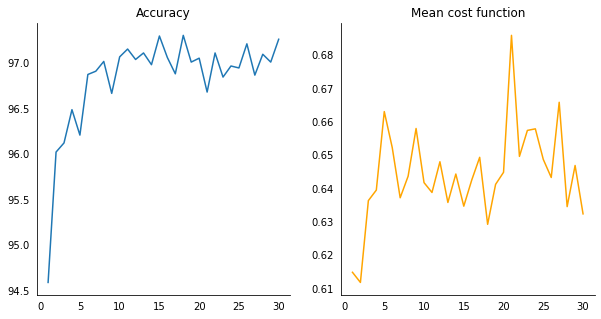

In [15]:
# acc, cf, acc_t, cf_t = result
visualisation(*result)

Training by: mini_batch_size
42000
Epoch 1 training complete
 evaluation data
    | Accuracy: 92.485714 
    | Cost:     0.511289

Epoch 2 training complete
 evaluation data
    | Accuracy: 94.157143 
    | Cost:     0.426360

Epoch 3 training complete
 evaluation data
    | Accuracy: 94.607143 
    | Cost:     0.414534

Epoch 4 training complete
 evaluation data
    | Accuracy: 94.942857 
    | Cost:     0.407079

Epoch 5 training complete
 evaluation data
    | Accuracy: 95.078571 
    | Cost:     0.410294

Epoch 6 training complete
 evaluation data
    | Accuracy: 94.978571 
    | Cost:     0.408307

Epoch 7 training complete
 evaluation data
    | Accuracy: 95.271429 
    | Cost:     0.408312

Epoch 8 training complete
 evaluation data
    | Accuracy: 95.271429 
    | Cost:     0.415170

Epoch 9 training complete
 evaluation data
    | Accuracy: 95.478571 
    | Cost:     0.408028

Epoch 10 training complete
 evaluation data
    | Accuracy: 95.457143 
    | Cost:     0.421213

Epoc

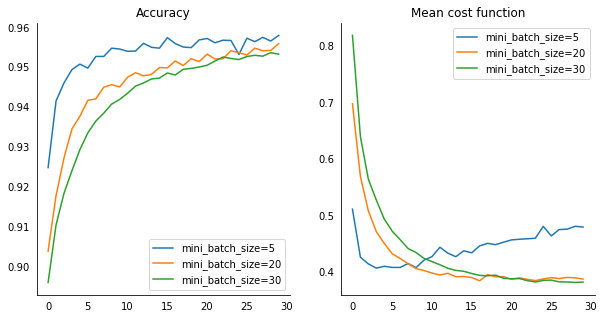

In [37]:
res = hyper_param_setting(
    training_data=train, 
    valid_data=valid, 
    random_state=42,
    net_architecture=[784, 30, 10],

    # SGD params 
    eta=0.1, 
    mini_batch_size=10, 
    lmbda=1., 
    epochs=30,
    monitor_evaluation_cost=True, 
    )
comparing_hyper_params(res[1], res[0])

In [11]:
(np.array(acc)-np.array(acc_t)).mean()

1.6066666666666654